In [4]:
import sys
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install mpmath
!{sys.executable} -m pip install powerlaw

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
import powerlaw
from scipy.io import loadmat
import numpy as np

In [39]:
x = loadmat('synth.mat')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [29]:
x['durs'].shape

(6, 4)

In [44]:
x['durs'][0][0][0]

array([ 3, 13, 11, ...,  2,  3,  8], dtype=uint8)

In [112]:
i=0
j=0
d = x['durs'][i][j][0]
fit = powerlaw.Fit(d, xmin=min(d), xmax=max(d))
# fit = powerlaw.Fit(d, xmin=min(d), xmax=30)
# fit = powerlaw.Fit(d)
print('({},{}), a={}, s={}'.format(fit.xmin, fit.xmax, fit.alpha, fit.sigma))

(1.0,77.0), a=2.154867363073726, s=0.00666762982948929


#### Power law

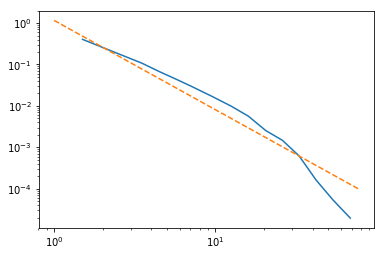

In [113]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(linestyle='--', ax=fig)

#### Truncated power law

Assuming nested distributions


(-121.68412910693371, 0.0)

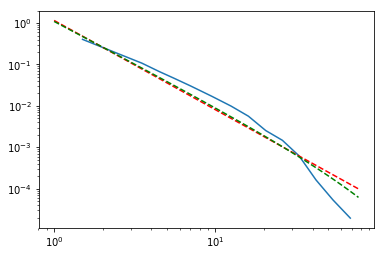

In [114]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.truncated_power_law.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'truncated_power_law')

In [120]:
print('{}'.format(1/fit.truncated_power_law.parameter2))
vars(fit.truncated_power_law)

86.06905631394615


{'xmin': 1.0,
 'xmax': 77.0,
 'discrete': False,
 'fit_method': 'Likelihood',
 'discrete_approximation': 'round',
 'parameter1': 2.0475858460005743,
 'parameter2': 0.011618577486807714,
 'parameter3': None,
 'parameter1_name': 'alpha',
 'parameter2_name': 'lambda',
 'parameter3_name': None,
 'parent_Fit': <powerlaw.Fit at 0x1a24a8ab38>,
 'alpha': 2.0475858460005743,
 'Lambda': 0.011618577486807714,
 'noise_flag': False,
 'loglikelihood': -51535.759964600365,
 'D_plus': 0.13381639703821446,
 'D_minus': 0.004583160159634114,
 'Kappa': 1.0105843221276913,
 'V': 0.13839955719784858,
 'D': 0.13381639703821446,
 'Asquare': inf}

#### Exponential

(10197.54707049016, 0.0)

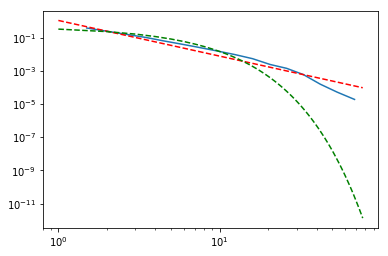

In [116]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.exponential.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'exponential')

#### Lognormal

'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


(-6.327004840936194, 8.280409741132635e-14)

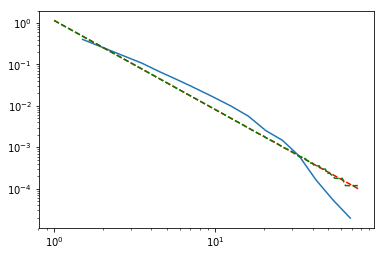

In [117]:
fig = powerlaw.plot_pdf(d)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)
fit.lognormal.plot_pdf(color='g', linestyle='--', ax=fig)
fit.distribution_compare('power_law', 'lognormal')